# Exploratory Data Analysis - Retail

### by : Karan Sharma

# Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
# to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

lets check for the null values and take an exposure about our all DataFrame Columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


1. No null data is present in our dataframe
2. We have a more of categorical data

In [6]:
df.nunique() # unique values in each column

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

As you can see  above that the selling of consumer goods has been distributed in 531 cities across 49 states in United States. Also the goods can be Categorize in 3 main Categories and 17 Sub-Categories. both these things will help us finding the weak areas of the business and highest profit area.  

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Before we start exploring categories and sub categories of goods, lets first see if there is any correlation between Sales, Quantity and Discount with Profit.

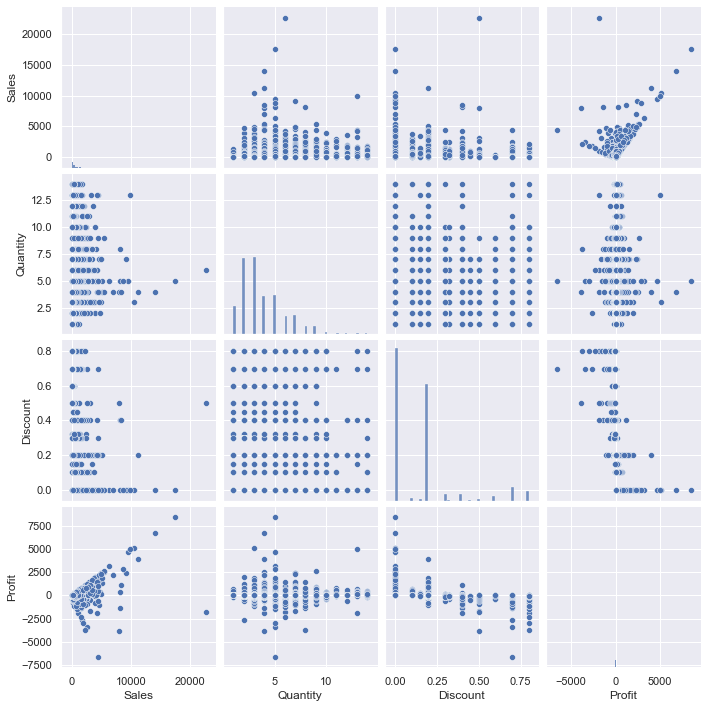

In [8]:
columns = ['Sales', 'Quantity', 'Discount', 'Profit']
sns.pairplot(df[columns])

1. There is No correlation between any of them except a very slight Correlation between Profit and Sales. Profit tends to increase with Sales. 
2. Even Quantity and Discount has Negligible Relation with Profit.

lets see the strength of relationship using correlation matrix

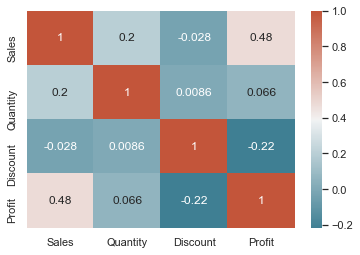

In [9]:
corr = df[columns].corr()
sns.heatmap(corr, xticklabels = corr.columns , yticklabels = corr.columns, annot = True, 
                            cmap = sns.diverging_palette(220, 20, as_cmap = True))

Discount Seems to have no relation at all with Profit and Sales.

Text(0, 0.5, 'Count')

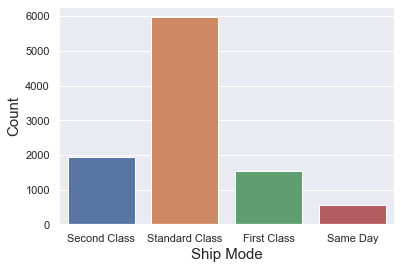

In [10]:
ax = sns.countplot('Ship Mode', data = df)
ax.set_xlabel('Ship Mode', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)

Most Customers prefer Standard Class as their Ship Mode

Text(0, 0.5, 'Count')

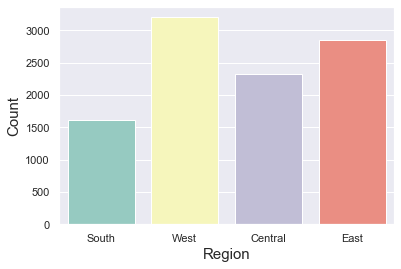

In [11]:
# Region wise Sales
ax = sns.countplot('Region', data = df, palette = 'Set3')
ax.set_xlabel('Region', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)

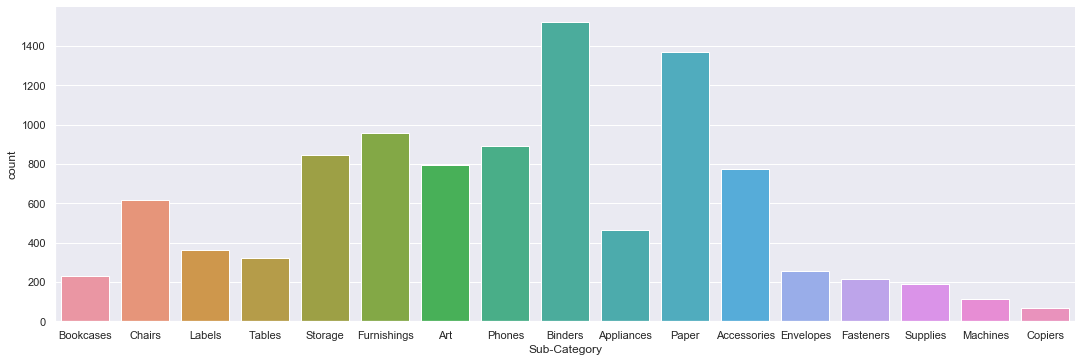

In [12]:
# Product with highest/lowest Sales
sns.catplot(x = 'Sub-Category', data = df, kind = 'count', aspect = 3, height = 5)

Maximum Sales belong to Binders, Papers, Storage, etc.

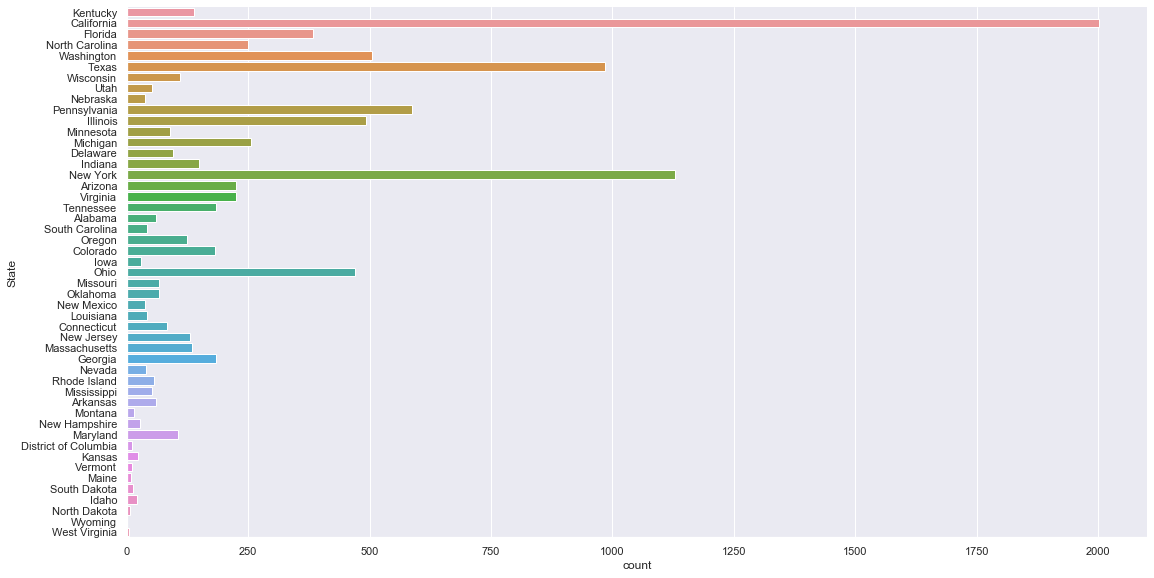

In [13]:
# Sales in different States of US
sns.catplot(y = 'State', data = df, kind = 'count', aspect = 2, height =8)

Highest number of Customers are from California and New York City.

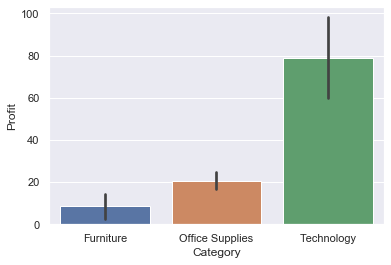

In [14]:
# Profit in different categories
sns.barplot(x = 'Category', y = 'Profit', data = df)

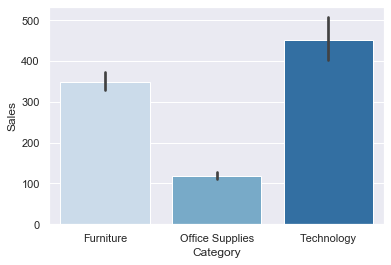

In [15]:
# Sales in different categories
sns.barplot(x = 'Category', y = 'Sales', data = df, palette = 'Blues')

Though the Sales are lot more in furniture Category but the profit is very less. Technology is leading in terms of Sales and Profit.

Text(0, 0.5, 'Sales')

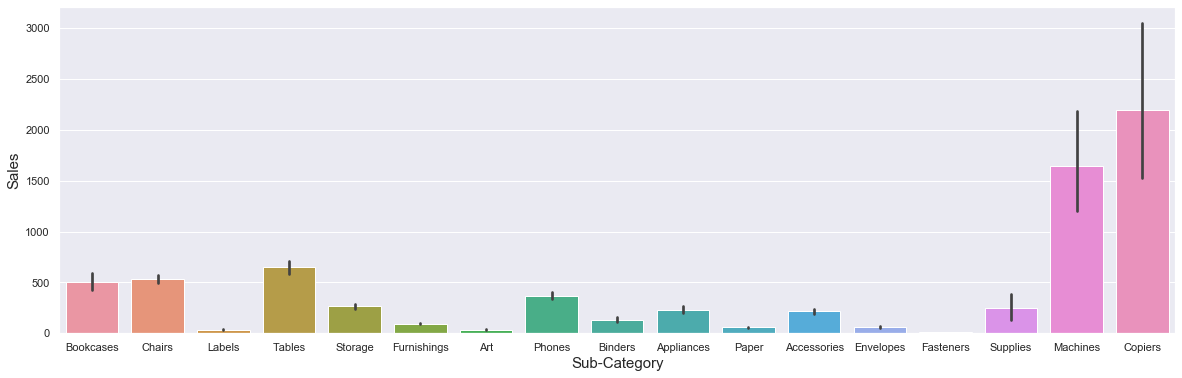

In [16]:
# Product with Highest/lowest Sales
plt.figure(figsize = (20, 6))
ax = sns.barplot(x = 'Sub-Category', y = 'Sales', data = df)
ax.set_xlabel('Sub-Category', fontsize = 15)
ax.set_ylabel('Sales', fontsize = 15)

Text(0, 0.5, 'Profit')

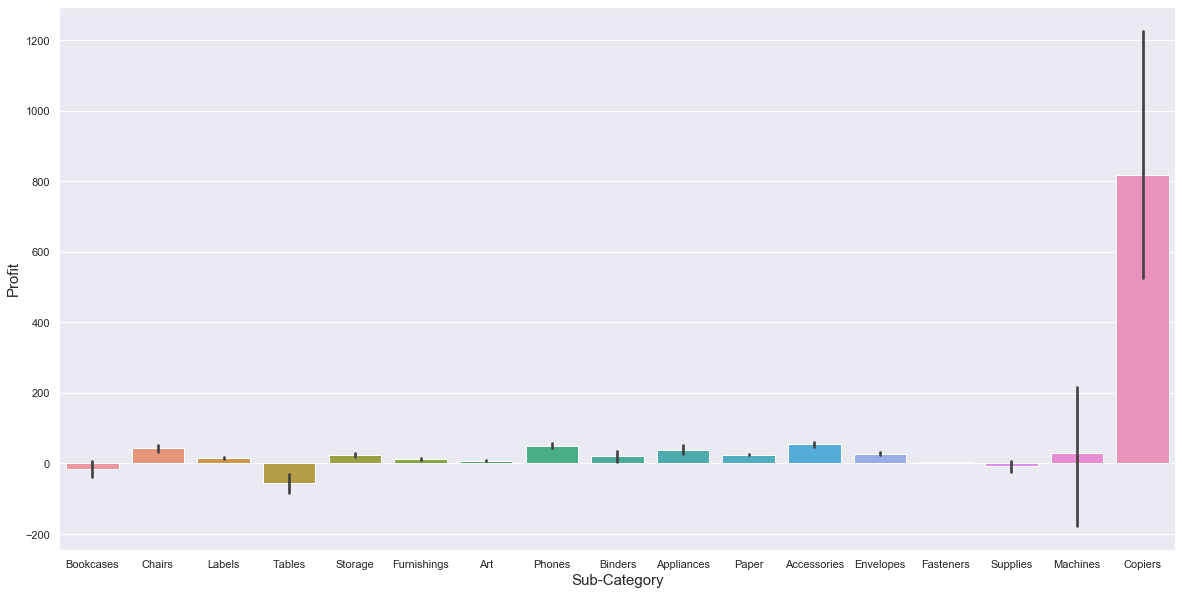

In [17]:
plt.figure(figsize = (20, 10))
ax = sns.barplot(x = 'Sub-Category', y = 'Profit', data = df)
ax.set_xlabel('Sub-Category', fontsize = 15)
ax.set_ylabel('Profit', fontsize = 15)

Copiers Contributes more to profit. though the sales are high enough for Tables we faced highest loss there

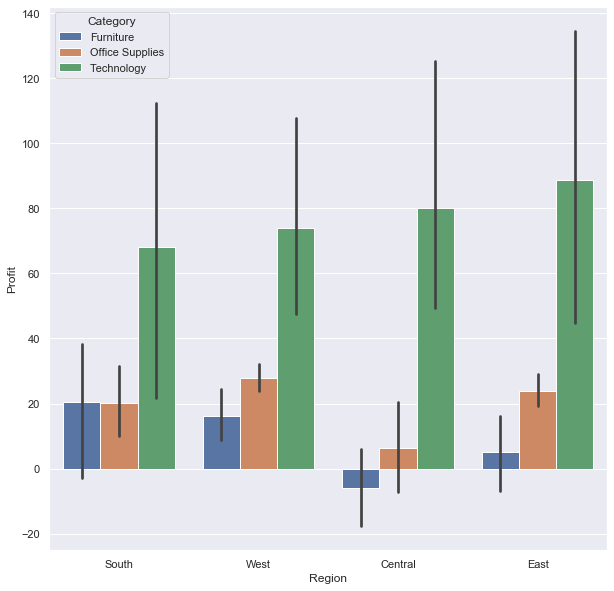

In [55]:
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Region', y = 'Profit', data = df, hue ='Category')

Central region suffers from loss in Furniture Category. Profit is less in every Region for Furniture.

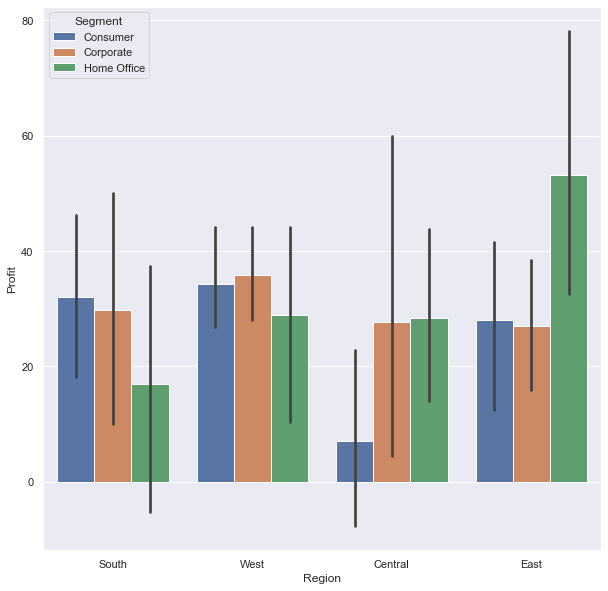

In [60]:
# Profit in different segments along with Region
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Region', y = 'Profit', data = df, hue ='Segment')

In [67]:
States_with_highest_profit = df.groupby('State')['Profit'].agg(sum).sort_values(ascending = False)
States_with_highest_profit.head()

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

# Observations :

1. Better Strategies needed for Furniture Category as Profit is very less and suffered from loss in Central Region.
2. Sales of Copiers Sub-Category is generating Highest profit. Category Technology is leading in Profit and Sales.
3. Cities like California, Newyork has the Highest Sales as well as Profit.
4. Sub-Categories Tables and Bookcases suffering loss. Most Customers prefer Standard as their Shipping Mode.
